In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [5]:
df_full = pd.read_fwf("brain_body.txt")

#df
df_full.sort_values(by='Body')

,Brain,Body
13,0.005,0.14
39,0.010,0.25
19,0.023,0.30
54,0.048,0.33
38,0.023,0.40
...,...,...
21,521.000,655.00
27,529.000,680.00
31,62.000,1320.00
18,2547.000,4603.00


###CHECKING IF DATA IS GOOD, IF NEEDS ENCODING

In [6]:
df_full.shape


(62, 2)

In [7]:
df_full.isnull().sum()

Brain    0
Body     0
dtype: int64

In [8]:
df_full.duplicated(keep='first')

0     False
1     False
2     False
3     False
4     False
      ...  
57    False
58    False
59    False
60    False
61    False
Length: 62, dtype: bool

In [9]:
#CHECKING IF DATA NEEDS TO BE ENCODED (IF ALL THE DATA IS OF NUMERIC TYPIC)

df_full.dtypes

Brain    float64
Body     float64
dtype: object

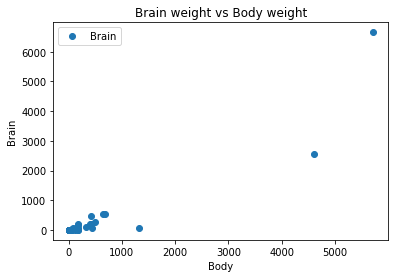

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [10]:
#CHECKING IF THERE IS A LINEAR RELATION BETWEEN FEATURE AND TARGET

#df_full.groupby('Body')['Brain'].mean().plot()
df_full.plot(x='Body', y='Brain', style='o')
plt.title('Brain weight vs Body weight')
plt.xlabel('Body')
plt.ylabel('Brain')
plt.show()

df_full.corr()

1. High Correlation b/w data. hence can perform LINEAR REGRESSION

###**TASK 1**

In [11]:
df_full.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


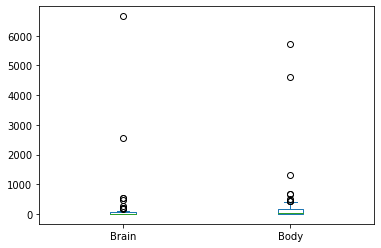

In [12]:
df_full.plot(kind= 'box')

1. As the heaviest mammal in the world is 8000kg, it is safe to assume that the Maximum value for the **Average Body weight column** can be 5712kg. However, on plotting the data in the BOX PLOT, we can see that the IQR calculated considers them as Outliers.

2. So, we shall take 2 instances, one with the entire data and one with the outliers deleted, and then we shall create our models.

3. To delete the Outliers we shall calculate the 10th and 90th percentile and use these values to delete records. 

In [13]:
#Calculating 10th and 90th percentile to CAP the Data and remove OUTLIERS

tenth_percentile = np.percentile(df_full['Body'],10)
ninetieth_percentile = np.percentile(df_full['Body'],90)
#print("Tenth percentile: ", tenth_percentile)
#print("Nintieth percentile: ", ninetieth_percentile)

df_noOutliers = df_full.copy(deep=True)
df_noOutliers= df_noOutliers[(df_noOutliers['Body'] <= ninetieth_percentile) & (df_noOutliers['Body'] >= tenth_percentile)]

In [26]:
df_noOutliers.describe() # NEW DATAFRAME WITHOUT OUTLIERS

,Brain,Body
count,48.000000,48.000000
mean,35.615208,76.060417
std,82.966056,113.081815
min,0.075000,1.200000
25%,0.915000,6.150000
50%,3.342500,17.250000
75%,18.037500,115.000000
max,465.000000,423.000000


SPLITING THE DATA INTO TRAINING AND TESTING 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression           #importing all the required functions

In [16]:
# MODEL WITH FULL DATA

X= df_full.iloc[ : , [1]].values  # Body weight-- array of features
Y= df_full.iloc[ : , 0].values  # Brain weight-- array of targerts

#X
#Y

#---------------------------------------
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
#Y_test

#--------------------------------------

#Modelling

regressor = LinearRegression()                              # predicted Body weight = m * Brain weight + c  (y = m * x + c)

regressor.fit(X_train, Y_train)                             #Learning happens - GD is done and we get the final values of m and c

#--------------------------------------

Y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions

#Y_pred

In [17]:
#y = m * x + c

print("Predicted Brain weight (Y) = {} * Body_weight (x) + {}".format(regressor.coef_[0],regressor.intercept_))

Predicted Brain weight (Y) = 0.526597141781598 * Body_weight (x) + -14.654463527592043


In [18]:
from sklearn import metrics
print('R2- SCORE of this Equation:', metrics.r2_score(Y_test,Y_pred))

R2- SCORE of this Equation: 0.6755174152904667


In [19]:
df_ofFull = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df_ofFull

,Actual,Predicted
0,3.385,8.779109
1,14.830,37.057376
2,1.410,-5.439014
3,1.000,-11.178922
4,0.048,-14.480686
5,3.000,-1.489535
6,0.120,-14.127866
7,3.500,-8.967214
8,0.750,-8.177319
9,1.040,-11.758179


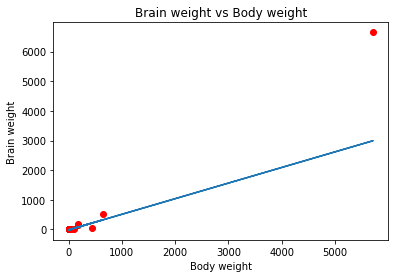

In [20]:
plt.plot(X_test, Y_test, 'or')
plt.plot(X_test, Y_pred)
plt.title('Brain weight vs Body weight')
plt.xlabel('Body weight')
plt.ylabel('Brain weight')
plt.show()

In [21]:
# MODEL WITH NO OUTLIERS

X_noOutliers= df_noOutliers.iloc[ : , [1]].values  # Body weight-- array of features
Y_noOutliers= df_noOutliers.iloc[ : , 0].values  # Brain weight-- array of targerts

#X
#Y

#--------------------------------------
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_noOutliers, Y_noOutliers, test_size=0.3)
#Y_test

#------------------------------------
#Modelling

regressor1 = LinearRegression()                              # predicted Body weight = m * Brain weight + c  (y = m * x + c)

regressor1.fit(X_train1, Y_train1)                             #Learning happens - GD is done and we get the final values of m and c

#------------------------------------

Y_pred1 = regressor1.predict(X_test1)

In [22]:
#y = m * x + c

print("Predicted Brain weight (Y) = {} * Body_weight (x) + {}".format(regressor1.coef_[0],regressor1.intercept_))

Predicted Brain weight (Y) = 0.6474560980071575 * Body_weight (x) + -15.461568697412844


In [23]:
print('R2- SCORE for this Equation:', metrics.r2_score(Y_test1,Y_pred1))

R2- SCORE for this Equation: 0.773157421569024


In [24]:
df_ofNoOutliers = pd.DataFrame({'Actual': Y_test1, 'Predicted': Y_pred1})
df_ofNoOutliers

,Actual,Predicted
0,1.000,-11.188358
1,1.410,-4.131087
2,160.000,93.958512
3,0.101,-12.871744
4,0.280,-14.231402
5,14.830,48.118620
6,0.550,-13.907674
7,0.920,-11.771069
8,0.200,-12.224288
9,0.900,-13.778183


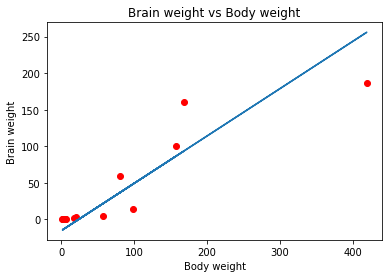

In [25]:
plt.plot(X_test1, Y_test1, 'or')
plt.plot(X_test1, Y_pred1)
plt.title('Brain weight vs Body weight')
plt.xlabel('Body weight')
plt.ylabel('Brain weight')
plt.show()